 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_df = pd.read_csv("Resources/whale_returns.csv")

whale_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

whale_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_df = whale_df.dropna()

whale_df.isnull().sum()



Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)

whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns

algo_df = pd.read_csv("Resources/algo_returns.csv")

algo_df.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [7]:
# Count nulls

algo_df.isnull().sum()




Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls

algo_df = algo_df.dropna()




algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)

algo_df


,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices

sp_df = pd.read_csv("Resources/sp500_history.csv")

sp_df.head()


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [10]:
# Check Data Types

sp_df.dtypes


Date     object
Close    object
dtype: object

In [11]:
# Fix Data Types

sp_df["Close"] = sp_df["Close"].str.replace('$', '', regex=True)

sp_df["Close"] = pd.to_numeric(sp_df["Close"], errors='coerce')

sp_df.set_index(pd.to_datetime(sp_df['Date'], infer_datetime_format=True), inplace=True)

sp_df


,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06
...,...,...
2012-10-05,5-Oct-12,1460.93
2012-10-04,4-Oct-12,1461.40
2012-10-03,3-Oct-12,1450.99


In [12]:
# Calculate Daily Returns

sp_df.drop(columns=['Date'], inplace=True)
sp_df = sp_df.sort_values(by="Date", ascending = True)

sp_df["Close"] = sp_df["Close"].pct_change()

sp_df


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls

sp_df = sp_df.dropna()

sp_df


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.

sp_df = sp_df.rename(columns = {"Close": "S&P 500"})

sp_df

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
whale_df.drop(columns=['Date'], inplace=True)

whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [17]:
algo_df.drop(columns=['Date'], inplace=True)

algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


combined_df = pd.concat([whale_df, algo_df, sp_df], join="inner", axis =1)

combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

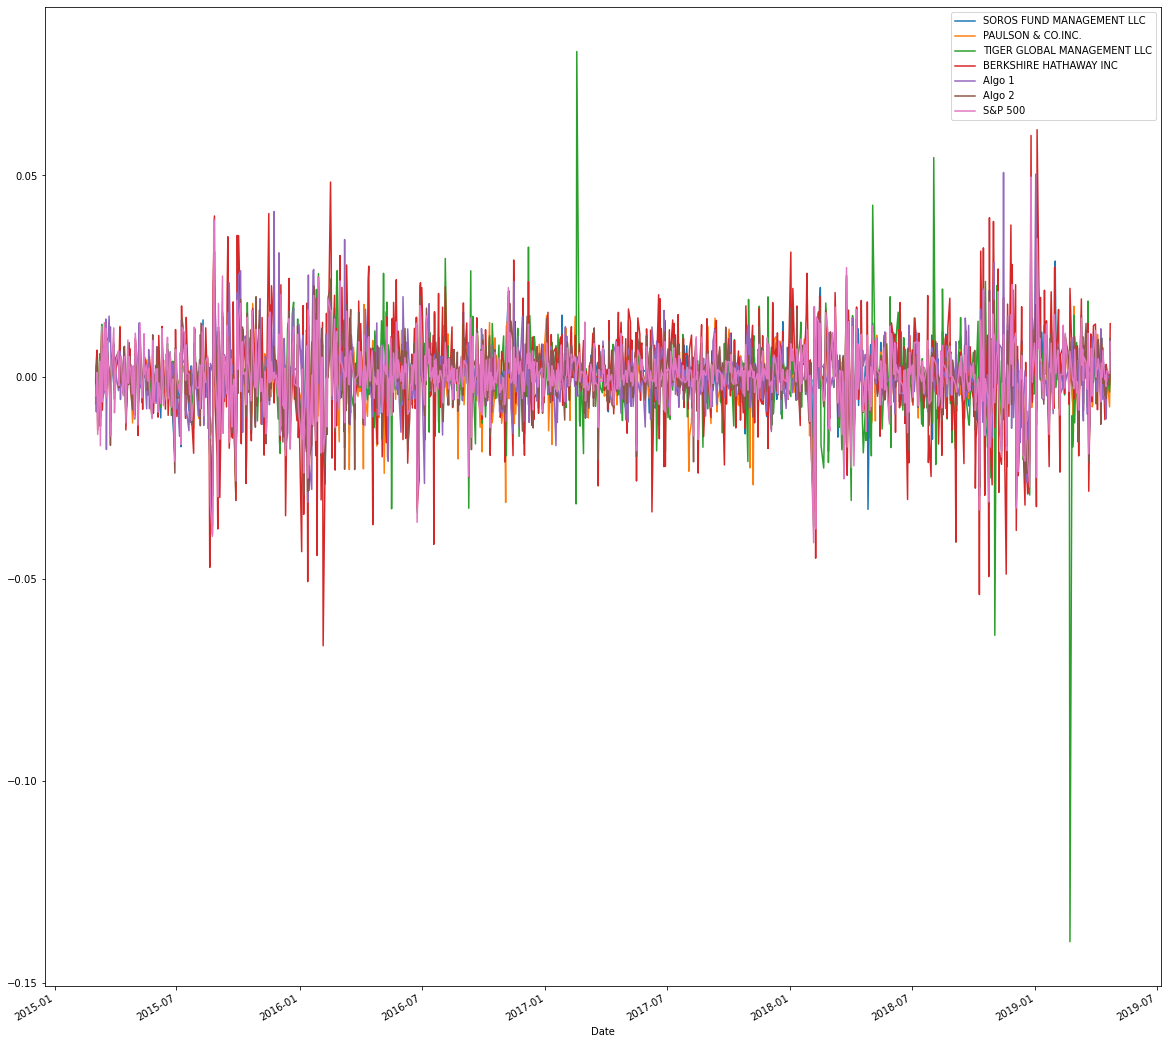

In [19]:
# Plot daily returns of all portfolios


combined_df.plot(figsize=(20, 20))

#### Calculate and Plot cumulative returns.

In [29]:
# Calculate cumulative returns of all portfolios

port_cumulative_returns = (1+combined_df).cumprod()

port_cumulative_returns





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986


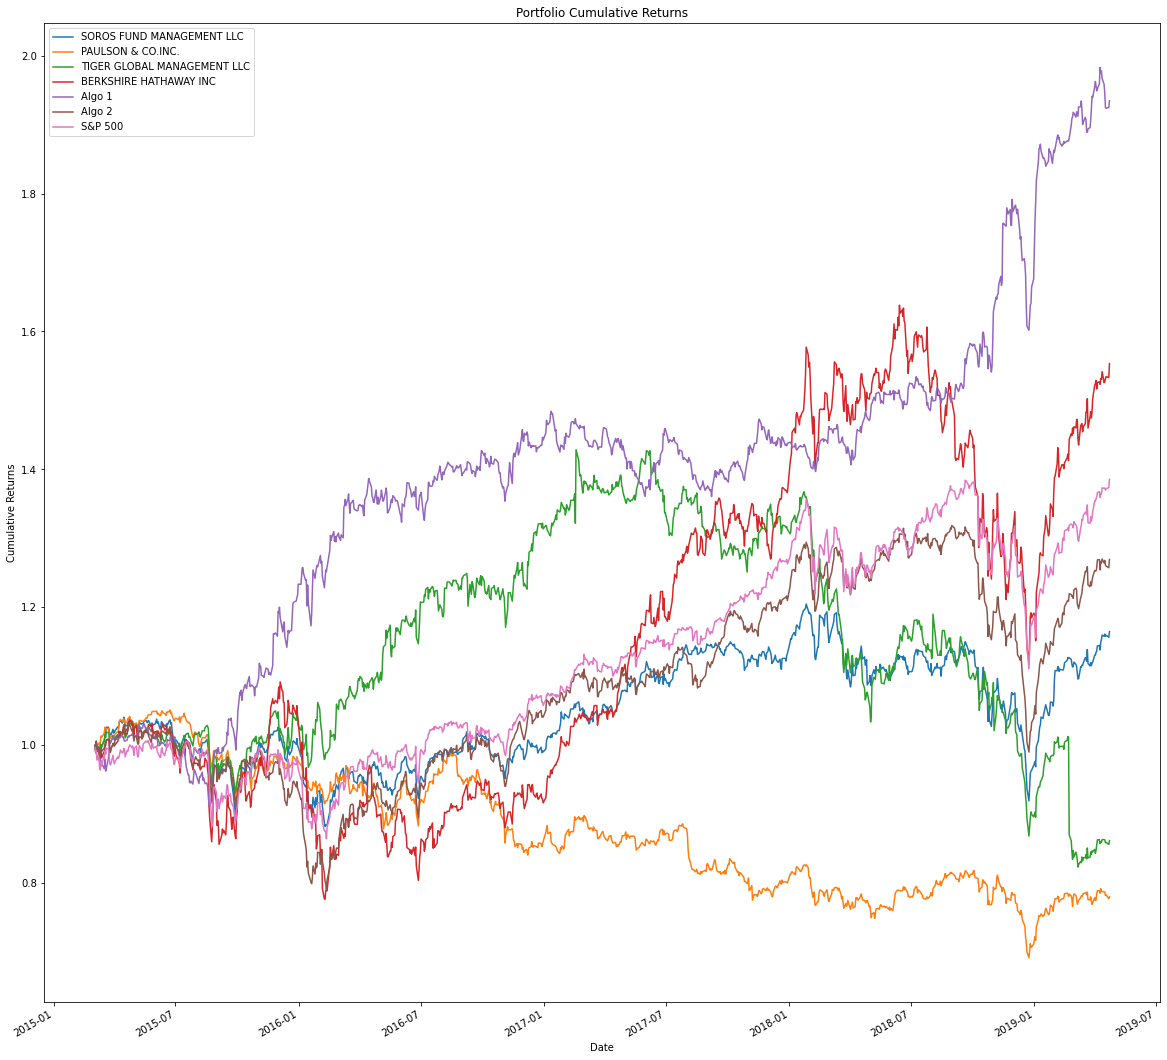

In [31]:

plot_ax = port_cumulative_returns.plot(figsize=(20, 20), xlabel = "Date", ylabel = "Cumulative Returns", title = "Portfolio Cumulative Returns")





---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

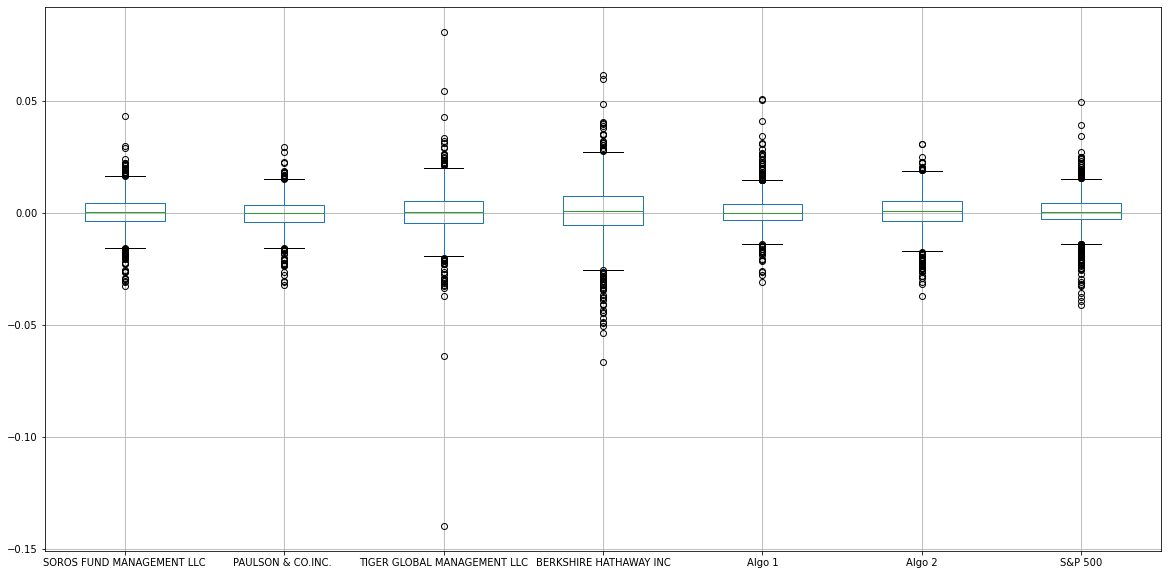

In [32]:
# Box plot to visually show risk



# port_cumulative_returns.boxplot(figsize = (20, 10))

combined_df.boxplot(figsize = (20, 10))




### Calculate Standard Deviations

In [226]:
# Calculate the daily standard deviations of all portfolios

port_returns_std = pd.DataFrame(combined_df.std()).rename(columns = {0: "Standard Deviation"})

port_returns_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [227]:
# Calculate  the daily standard deviation of S&P 500

sp_500_std = port_returns_std.loc["S&P 500"]

# Determine which portfolios are riskier than the S&P 500

# check for standard deviation greater than S&P 500's standard deviation

print("Analysis")
print("------------------------------------------------------------")

for index, row in port_returns_std.iterrows(): 
    if(row["Standard Deviation"]>sp_500_std["Standard Deviation"]) :
        print(f"{row.name} with a standard deviation of {row['Standard Deviation']} has a higher risk than S&P 500")
    





Analysis
------------------------------------------------------------
TIGER GLOBAL MANAGEMENT LLC with a standard deviation of 0.010893969618743005 has a higher risk than S&P 500
BERKSHIRE HATHAWAY INC with a standard deviation of 0.012918618441883491 has a higher risk than S&P 500


### Calculate the Annualized Standard Deviation

In [136]:
# Calculate the annualized standard deviation (252 trading days)

annual_port_std =  port_returns_std*np.sqrt(252)


annual_port_std


,Standard Deviation
SOROS FUND MANAGEMENT LLC,1.162620
PAULSON & CO.INC.,1.404180
Algo 2,2.090678
S&P 500,2.293036
TIGER GLOBAL MANAGEMENT LLC,2.378706
Algo 1,3.687285
BERKSHIRE HATHAWAY INC,3.834878


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 day Rolling Standard Deviation'}, xlabel='Date'>

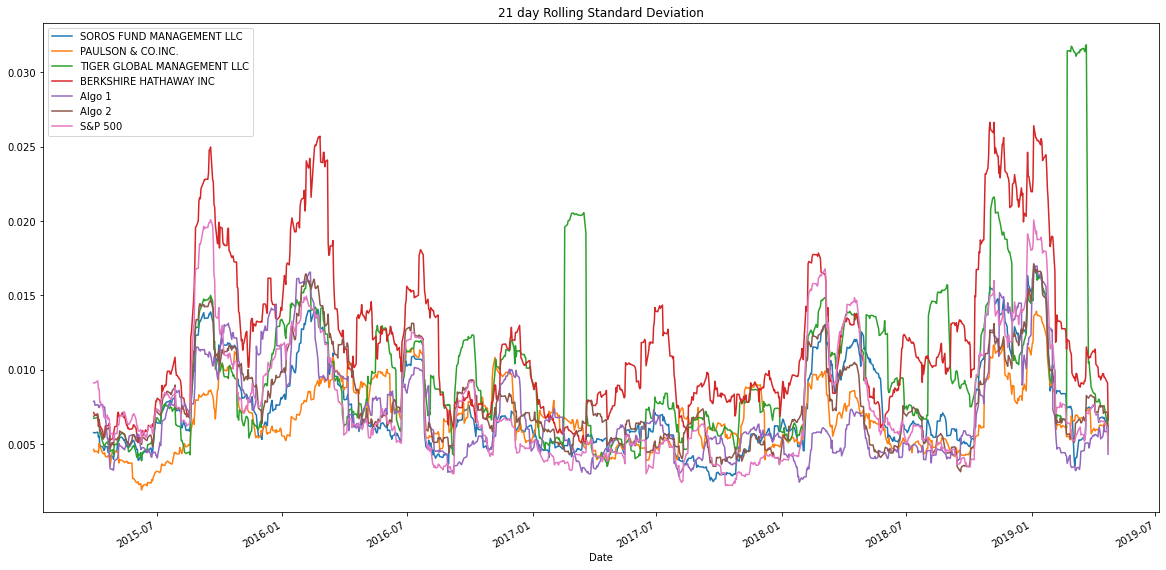

In [229]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

port_21day_std =  combined_df.rolling(window=21).std()



# Plot the rolling standard deviation

port_21day_std.plot(figsize=(20,10), title="21 day Rolling Standard Deviation")


### Calculate and plot the correlation

In [149]:
# Calculate the correlation

port_corr = combined_df.corr()

port_corr



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

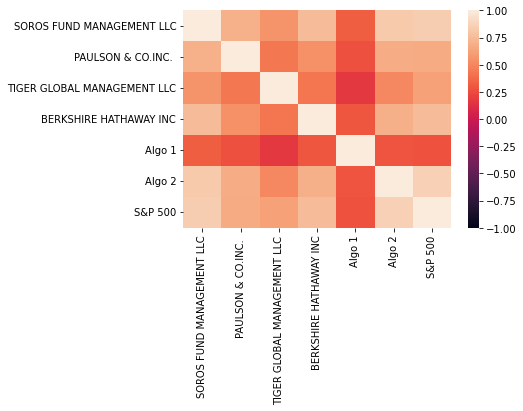

In [148]:
# Display de correlation matrix

import seaborn as sns

sns.heatmap(port_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Berkshire Hathway'}, xlabel='Date'>

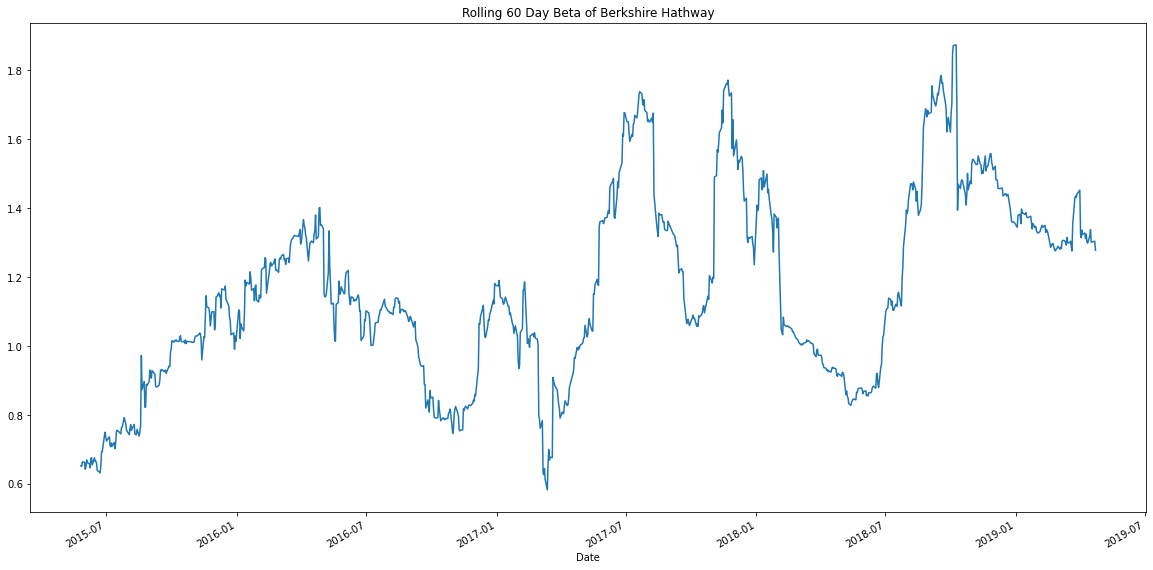

In [235]:
# Calculate covariance of a single portfolio

berkshire_hathway_cov = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])


# Calculate variance of S&P 500

sp_var = combined_df['S&P 500'].var()

# Computing beta

berkshire_hathway_beta = berkshire_hathway_cov / sp_var

# Plot beta trend
# for 60 day rolling window

# calculate rolling 60 day covariance for Berkshire Hathway

rolling_cov_berkshire_hathway = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])

# calculate rolling 60 day variance for S&P 500

rolling_var_sp = combined_df['S&P 500'].rolling(window=60).var()

# calculate 60 day rolling beta

rolling_beta_60day = rolling_cov_berkshire_hathway / rolling_var_sp

# plot rolling 60 day beta for Berkshire Hathway

rolling_beta_60day.plot(figsize=(20, 10), title='Rolling 60 Day Beta of Berkshire Hathway')




## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

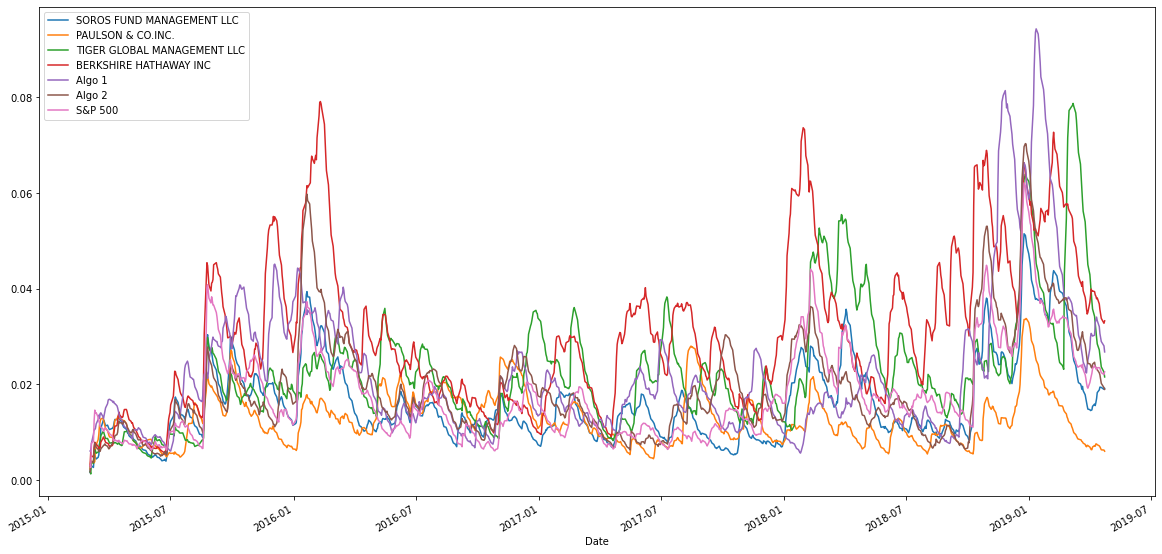

In [161]:
# Use `ewm` to calculate the rolling window

port_21day_wma_std = port_cumulative_returns.ewm(span=21, adjust=False).std()

port_21day_wma_std.plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))



annual_sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

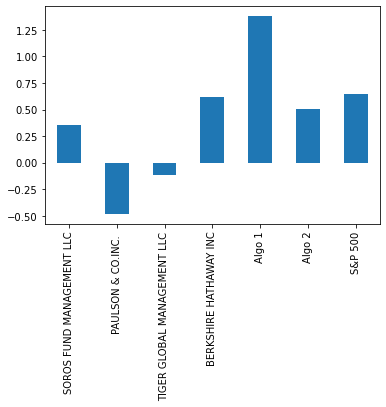

In [170]:
# Visualize the sharpe ratios as a bar plot


annual_sharpe_ratios.plot(kind="bar")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algorithm Strategies portfolio has Sharpe ratios of 1.378648 and 0.501364 while the S&P 500 has a SharPe ratio of 0.648267 which depicts that the Algo1 portfolio out performs the S&P 500, while the Algo2 underperforms compared to the S&P 500 by a small margin.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [187]:
# Reading data from 1st stock

adp_df = pd.read_csv("Resources/ADP.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

adp_df


,Close
Date,
2018-05-01,118.80
2018-05-02,122.06
2018-05-03,123.10
2018-05-04,125.36
2018-05-07,125.57
...,...
2019-04-24,163.50
2019-04-25,163.86
2019-04-26,163.70


In [188]:
# Reading data from 2nd stock

msft_df = pd.read_csv("Resources/Microsoft.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

msft_df


,Close
Date,
2018-05-01,95.00
2018-05-02,93.51
2018-05-03,94.07
2018-05-04,95.16
2018-05-07,96.22
...,...
2019-04-24,125.01
2019-04-25,129.15
2019-04-26,129.89


In [189]:
# Reading data from 3rd stock

cisco_df = pd.read_csv("Resources/Cisco.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

cisco_df


,Close
Date,
2018-05-01,44.83
2018-05-02,43.86
2018-05-03,44.44
2018-05-04,45.30
2018-05-07,45.73
...,...
2019-04-24,56.88
2019-04-25,56.33
2019-04-26,55.88


In [196]:
# Combine all stocks in a single DataFrame

my_combined_df = pd.concat([adp_df, msft_df, cisco_df], join="inner", axis = "columns")


In [195]:
# Reset Date index

my_combined_df.sort_index(inplace = True)


,Close,Close,Close
Date,,,
2018-05-01,118.80,95.00,44.83
2018-05-02,122.06,93.51,43.86
2018-05-03,123.10,94.07,44.44
2018-05-04,125.36,95.16,45.30
2018-05-07,125.57,96.22,45.73
...,...,...,...
2019-04-24,163.50,125.01,56.88
2019-04-25,163.86,129.15,56.33
2019-04-26,163.70,129.89,55.88


In [197]:
# Reorganize portfolio data by having a column per symbol

my_combined_df.columns = ["ADP", "Microsoft", "Cisco"]

my_combined_df


,ADP,Microsoft,Cisco
Date,,,
2018-05-01,118.80,95.00,44.83
2018-05-02,122.06,93.51,43.86
2018-05-03,123.10,94.07,44.44
2018-05-04,125.36,95.16,45.30
2018-05-07,125.57,96.22,45.73
...,...,...,...
2019-04-24,163.50,125.01,56.88
2019-04-25,163.86,129.15,56.33
2019-04-26,163.70,129.89,55.88


In [204]:
# Calculate daily returns

my_port_returns = my_combined_df.pct_change()

# Drop NAs

my_port_returns_daily = my_port_returns.dropna()

# Display sample data

my_port_returns_daily


,ADP,Microsoft,Cisco
Date,,,
2018-05-02,0.027441,-0.015684,-0.021637
2018-05-03,0.008520,0.005989,0.013224
2018-05-04,0.018359,0.011587,0.019352
2018-05-07,0.001675,0.011139,0.009492
2018-05-08,0.001593,-0.004261,-0.000437
...,...,...,...
2019-04-24,-0.009331,-0.003428,0.003352
2019-04-25,0.002202,0.033117,-0.009669
2019-04-26,-0.000976,0.005730,-0.007989


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [212]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_port_weighted_returns = my_port_returns_daily.dot(weights)

# Display sample data

my_port_weighted_returns


Date
2018-05-02   -0.003293
2018-05-03    0.009244
2018-05-04    0.016433
2018-05-07    0.007436
2018-05-08   -0.001035
                ...   
2019-04-24   -0.003136
2019-04-25    0.008550
2019-04-26   -0.001078
2019-04-29   -0.000262
2019-04-30    0.003926
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [217]:
# Join your returns DataFrame to the original returns DataFrame

my_port_weighted_df = pd.DataFrame(my_port_weighted_returns).rename(columns = {0 : "Personal Portfolio"})

combined_portfolios = pd.concat([combined_df, my_port_weighted_df], join = "inner", axis = "columns")

combined_portfolios






,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Portfolio
Date,,,,,,,,
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,-0.003293
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,0.009244
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.016433
2018-05-07,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458,0.007436
2018-05-08,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266,-0.001035
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.001609
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000474
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004073


In [218]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_portfolios.isnull().sum()

# no nulls in the dataframe


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Personal Portfolio             0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [228]:
# Calculate the annualized `std`

combined_portfolios_annual_std = pd.DataFrame((combined_portfolios.std())*np.sqrt(252)).rename(columns = {0: "Annual Standard Deviation"})

combined_portfolios_std


,Annual Standard Deviation
SOROS FUND MANAGEMENT LLC,0.145918
PAULSON & CO.INC.,0.117386
TIGER GLOBAL MANAGEMENT LLC,0.234438
BERKSHIRE HATHAWAY INC,0.243474
Algo 1,0.132099
Algo 2,0.137833
S&P 500,0.150905
Personal Portfolio,0.209296


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 day Rolling Standard Deviation'}, xlabel='Date'>

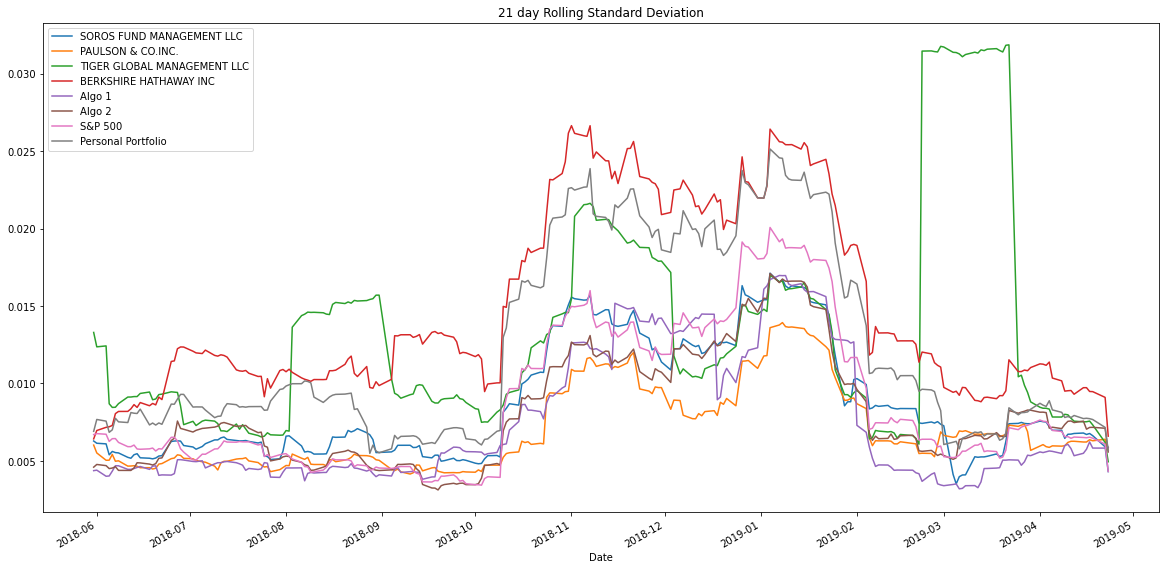

In [221]:
# Calculate rolling standard deviation

rolling_21day_std = combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation

rolling_21day_std.plot(figsize=(20,10), title="21 day Rolling Standard Deviation")


### Calculate and plot the correlation

<AxesSubplot:>

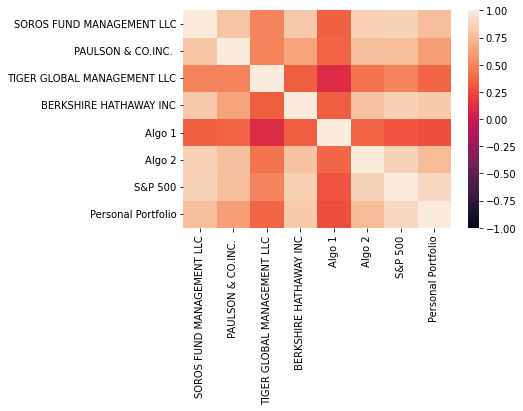

In [231]:
# Calculate and plot the correlation
combined_portfolios_corr = combined_portfolios.corr()



sns.heatmap(combined_portfolios_corr, vmin=-1, vmax=1)



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Personal Portfolio'}, xlabel='Date'>

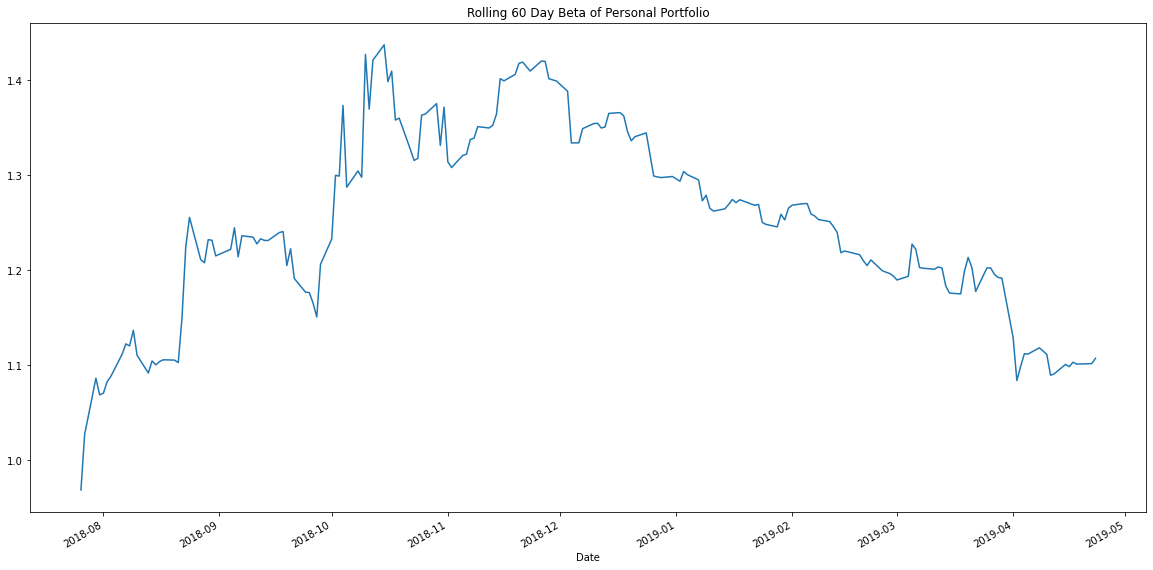

In [232]:
# calculate rolling 60 day covariance for Personal portfolio

rolling_covariance_personal_port = combined_portfolios['Personal Portfolio'].rolling(window=60).cov(combined_df['S&P 500'])

# calculate rolling 60 day variance for S&P 500

rolling_variance_sp = combined_portfolios['S&P 500'].rolling(window=60).var()

# calculate 60 day rolling beta

rolling_beta_60day_personal = rolling_covariance_personal_port / rolling_variance_sp

# plot rolling 60 day beta for Personal Portfolio

rolling_beta_60day_personal.plot(figsize=(20, 10), title='Rolling 60 Day Beta of Personal Portfolio')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [236]:
# Calculate Annualized Sharpe Ratios

annual_personal_sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))

annual_personal_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.470071
PAULSON & CO.INC.              0.211396
TIGER GLOBAL MANAGEMENT LLC   -0.764089
BERKSHIRE HATHAWAY INC         0.241674
Algo 1                         2.188740
Algo 2                         0.241649
S&P 500                        0.756139
Personal Portfolio             1.506641
dtype: float64

<AxesSubplot:>

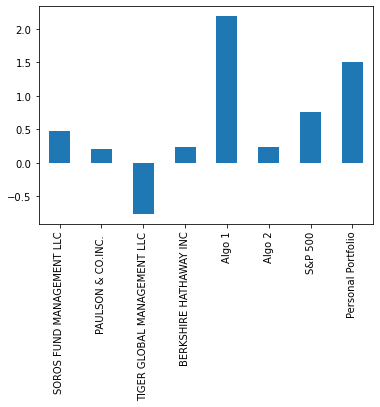

In [237]:
# Visualize the sharpe ratios as a bar plot

annual_personal_sharpe_ratios.plot(kind="bar")


### How does your portfolio do?

Write your answer here!

In [240]:
print(f"My personal portfolio has a Sharpe ratio of {annual_personal_sharpe_ratios['Personal Portfolio']} and it outperformed the S&P 500 in the period of May 2018 to May 2019")

My personal portfolio has a Sharpe ratio of 1.5066406103905219 and it outperformed the S&P 500 in the period of May 2018 to May 2019
